# CUSTOMER SEGMENTATION WITH CLUSTERING

In [753]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

%matplotlib inline

In [754]:
data = pd.read_csv('Data/Mall_Customers.csv', sep=',')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.

Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

### Columns

- CustomerID: Unique ID assigned to the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Anual Income: Anual income of the customer
- Spending Score: Score assigned by the mall based on customer behavior and spending nature

### Task

Find the optimal number of clusters, understanding clusters as a group of clients with similar profiles

In [755]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [756]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [757]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [758]:
def uniques_val_col(df):
    for col in df:
        if col == 'Gender':
            pass
        elif col == 'CustomerID':
            pass
        else:
            print(col, data[col].unique(),'\n','min = {} - max = {}'.format(data[col].min(), data[col].max()),'\n',  sep='\n')

uniques_val_col(df=data)

Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]


min = 18 - max = 70


Annual Income (k$)
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]


min = 15 - max = 137


Spending Score (1-100)
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


min = 1 - max = 99




For getting insights at the first level in one hand we get if there are null values and in teh other the unique values, min and max values for every column.

###  Data Visualization

Count plot of gender

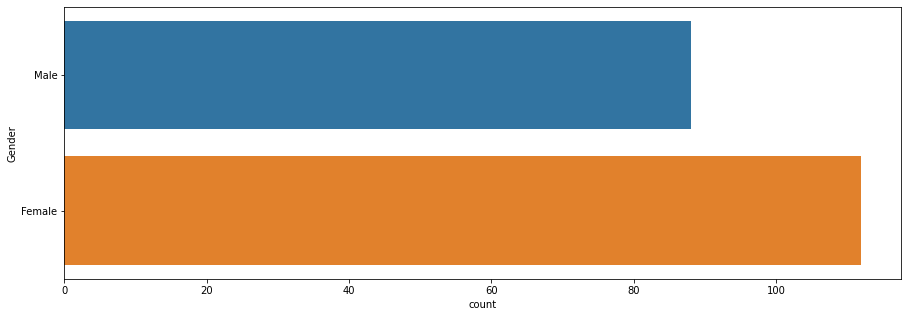

In [759]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data)
plt.show()

In [760]:
data.Gender.value_counts() # It has an acceptable balanced frequency between genders.

Female    112
Male       88
Name: Gender, dtype: int64

Pair plot for all the data (differentiating between men and women by colour)

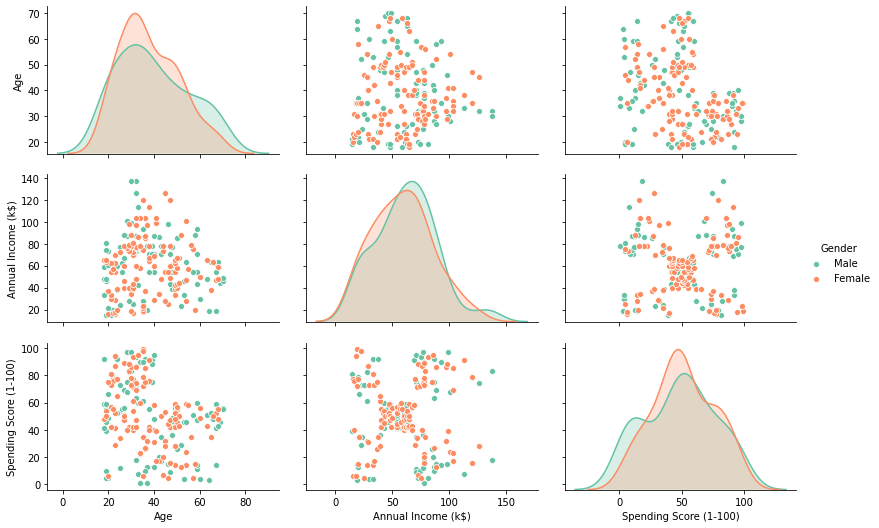

In [761]:
sns.pairplot(data.drop('CustomerID', axis=1), kind="scatter", hue="Gender", palette="Set2", aspect=1.5)

plt.show()

Histograms

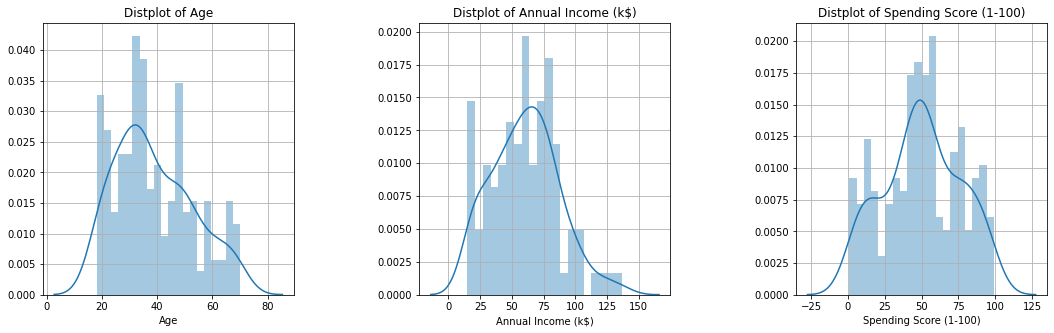

In [762]:
plt.figure(1 , figsize = (18 , 5))
n = 0 

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.grid(axis='both')
    plt.title('Distplot of {}'.format(x))

plt.show()

Swarm plots + Violin plots

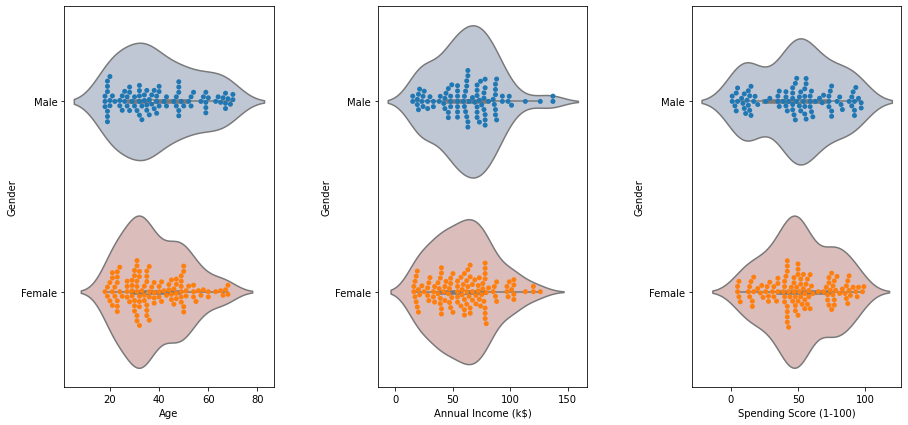

In [763]:
plt.figure(1 , figsize = (15 , 7))
n = 0 

for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = data , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = data)

plt.show()

Regplots

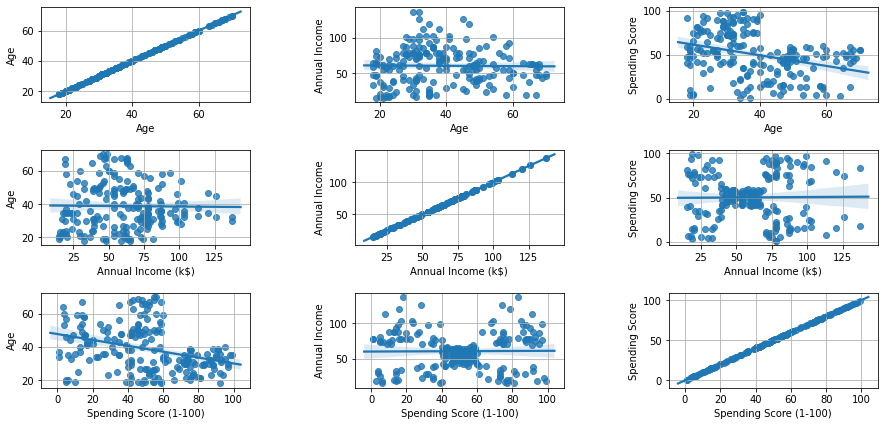

In [764]:
plt.figure(1 , figsize = (15 , 7))
n = 0 

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        plt.grid(axis='both')
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )

plt.show()

As we can se the distributions of the variables are normalized, and there isn't difference between gender in terms of data distribution. 

Through the regplot we can check some interesting relationships between the features:

- Age and income do not have a clear relationship, however the spending score decreases as much age.
- The spending score and the annual income do not show a clear relationship either.

The next step is check the explanaition of the variance by feature applying a PCA algorythm:

In [765]:
data['Gender'] = data.Gender.apply(lambda x: 1 if x == 'Female' else 0) # For using PCA weonly can pass numerical values so we must transform gender values into numerical.

pca = PCA().fit(data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.999) # d = Number od dimmensions or features than explain the 99.9 % of the variance

d

3

As we can see  3 features explain the 99.9 % of the variance so when we feed the model, we are going to drop 2 of 5 features: 'CustomerID' and 'Gemnder'. 

### OUTLIERS

We are going to define as outlier an instance which score is over 3, understanding z-score as the number of tipical deviations about the mean where the instance lies.

In [766]:
z = np.abs(stats.zscore(data))

z

array([[1.7234121 , 1.12815215, 1.42456879, 1.73899919, 0.43480148],
       [1.70609137, 1.12815215, 1.28103541, 1.73899919, 1.19570407],
       [1.68877065, 0.88640526, 1.3528021 , 1.70082976, 1.71591298],
       [1.67144992, 0.88640526, 1.13750203, 1.70082976, 1.04041783],
       [1.6541292 , 0.88640526, 0.56336851, 1.66266033, 0.39597992],
       [1.63680847, 0.88640526, 1.20926872, 1.66266033, 1.00159627],
       [1.61948775, 0.88640526, 0.27630176, 1.62449091, 1.71591298],
       [1.60216702, 0.88640526, 1.13750203, 1.62449091, 1.70038436],
       [1.5848463 , 1.12815215, 1.80493225, 1.58632148, 1.83237767],
       [1.56752558, 0.88640526, 0.6351352 , 1.58632148, 0.84631002],
       [1.55020485, 1.12815215, 2.02023231, 1.58632148, 1.4053405 ],
       [1.53288413, 0.88640526, 0.27630176, 1.58632148, 1.89449216],
       [1.5155634 , 0.88640526, 1.37433211, 1.54815205, 1.36651894],
       [1.49824268, 0.88640526, 1.06573534, 1.54815205, 1.04041783],
       [1.48092195, 1.12815215, 0.

In [767]:
np.where(z >= 3)

(array([], dtype=int64), array([], dtype=int64))

In the upper paragraph we have tried to get the position of the instances (first array is for the number of the row and the second for the column) where we have an instance above the z-score, 3, and as a result we get two empty arrays: There aren't outliers (Considering an outlier an instance with a z-score equal or greater than 3)

### CLUSTERING

K-Means

Let's see how perform the Kmeans with this dataset changing the number of the clusters that we take and the number of times (n_init) that the algorythm initilize the centroids. We are going to take the 'full' algorythm because we are working with a small dataset in a low dimensinality space so we can compute all the distances of the instances to get the centroids.

Let's going to create to loop the to see how perform, measured by the inertia, the model changing as we say n_init and n_clusters:

In [768]:
def inertia_per_K(k,n):
    for k in range(1,k+1):
        for n in range(1,n+1):
            inertia = round(KMeans(n_init=n, algorithm='full', n_clusters=k).fit(pre_data).inertia_, 2)
            if k >= 1:
                print('{}_cluster/s , init_{} = '.format(k+1, n), inertia, '\n') 

inertia_per_K(k=9,n=5)

2_cluster/s , init_1 =  224.85 

2_cluster/s , init_2 =  224.85 

2_cluster/s , init_3 =  224.85 

2_cluster/s , init_4 =  224.85 

2_cluster/s , init_5 =  224.85 

3_cluster/s , init_1 =  177.32 

3_cluster/s , init_2 =  170.32 

3_cluster/s , init_3 =  170.32 

3_cluster/s , init_4 =  170.28 

3_cluster/s , init_5 =  170.28 

4_cluster/s , init_1 =  147.85 

4_cluster/s , init_2 =  133.25 

4_cluster/s , init_3 =  133.26 

4_cluster/s , init_4 =  130.34 

4_cluster/s , init_5 =  133.26 

5_cluster/s , init_1 =  100.34 

5_cluster/s , init_2 =  106.62 

5_cluster/s , init_3 =  100.32 

5_cluster/s , init_4 =  100.32 

5_cluster/s , init_5 =  100.34 

6_cluster/s , init_1 =  82.79 

6_cluster/s , init_2 =  82.79 

6_cluster/s , init_3 =  90.51 

6_cluster/s , init_4 =  82.77 

6_cluster/s , init_5 =  82.77 

7_cluster/s , init_1 =  73.53 

7_cluster/s , init_2 =  75.33 

7_cluster/s , init_3 =  73.53 

7_cluster/s , init_4 =  73.06 

7_cluster/s , init_5 =  70.88 

8_cluster/s , init_1

In [769]:
def inertia_diminishing_returns_per_k(k, X):
    ines = []
    for k in range(1,k+1):
            inertia = round(KMeans(n_clusters=k).fit(X).inertia_, 2)
            ines.append(inertia)
                
    for i in range(1, len(ines)):
        dr = round(ines[i] - ines[i-1], 2)
        print('k = {} --- i = {} --- dr = {} '.format(i+1, ines[i], -dr))
                
    
inertia_diminishing_returns_per_k(k=10,X=pre_data)

k = 2 --- i = 170.28 --- dr = 54.57 
k = 3 --- i = 130.34 --- dr = 39.94 
k = 4 --- i = 100.32 --- dr = 30.02 
k = 5 --- i = 82.77 --- dr = 17.55 
k = 6 --- i = 70.87 --- dr = 11.9 
k = 7 --- i = 61.12 --- dr = 9.75 
k = 8 --- i = 52.29 --- dr = 8.83 
k = 9 --- i = 45.94 --- dr = 6.35 
k = 10 --- i = 40.92 --- dr = 5.02 


INERTIA BY CLUSTERS

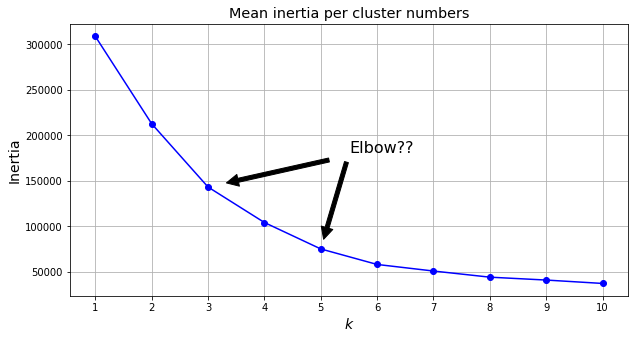

In [770]:
data_processed = data.drop(['CustomerID', 'Gender'], axis=1) # We drop the useless features 

def k_vs_inertia (X, k):

    kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                    for k in range(1, k+1)]
                
    inertias = [model.inertia_ for model in kmeans_per_k]

    plt.figure(figsize=(10, 5))
    plt.title('Mean inertia per cluster numbers', size='x-large')
    plt.grid(axis='both')
    plt.plot(range(1, k+1), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.xticks(np.arange(1, k+1, step=1))
    plt.annotate('Elbow??',
                 xy=(3, inertias[2]),
                 xytext=(0.55, 0.55),
                 textcoords='figure fraction',
                 fontsize=16,
                 arrowprops=dict(facecolor='black', shrink=0.13)
                 )
    plt.annotate('',
                 xy=(5, inertias[4]),
                 xytext=(0.55, 0.55),
                 textcoords='figure fraction',
                 fontsize=16,
                 arrowprops=dict(facecolor='black', shrink=0.1)
                 )
    
    plt.show()

k_vs_inertia (X=data_processed, k=10)

Inertia has diminishing returs as much clusters we have (If all instances are considerated as clusters, the inertia will be 0: the instance would be located in the centre of the cluster), but when we exceed the ideal number of clusters, the drop in inertia is less than when we lack some clusters.

In the graph we can't see clearly where the elbow is: from 2 to 5 clusters seems that there is more slope between the cluster numbers, although as we have said it is not clearly observed, but it seems that in 3 and 5 clusters there is an elbow at first sight. 

We are going to chech this with more performance metrics:

SIILHOUETTE SCORE BY CLUSTER

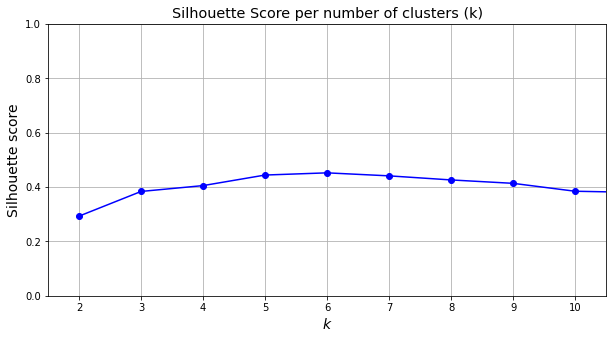

In [771]:
def plot_silhouette_scores(X, k):

    kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                    for k in range(1, k+2)]

    inertias = [model.inertia_ for model in kmeans_per_k]
    
    silhouette_scores = [silhouette_score(X, model.labels_) 
                         for model in kmeans_per_k[1:]]

    plt.figure(figsize=(10, 5))
    plt.grid(axis='both')
    plt.title('Silhouette Score per number of clusters (k)', size='x-large')
    plt.plot(range(2, k+2), silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    plt.axis([1.5, k+0.5, 0, 1])

    plt.show()
    

plot_silhouette_scores(X=data_processed, k=10)

the graph of the silhouette score also does not clarify the appropiate number of clusters but 5 and 6 cluster get the highest silhouette score

SILHOUETTE DIAGRAM

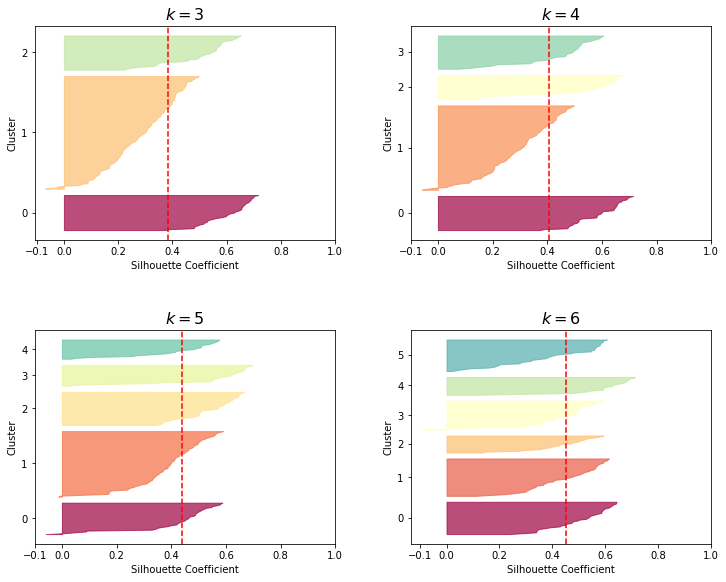

In [772]:
kmeans_per_k = [KMeans(n_clusters=k).fit(data_processed)
                    for k in range(1, 10)]

silhouette_scores = [silhouette_score(data_processed, model.labels_) 
                         for model in kmeans_per_k[1:]]

plt.figure(figsize=(11, 9))

plt.tight_layout(pad=5.0)

for k in (3, 4, 5, 6):
    plt.tight_layout(pad=4.0)
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_processed, y_pred)

    padding = len(data_processed) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (1, 2):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        plt.ylabel("Cluster")
    
    if k in (3, 4):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        plt.ylabel("Cluster")

    else:
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        plt.ylabel("Cluster")
         
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    
    plt.show

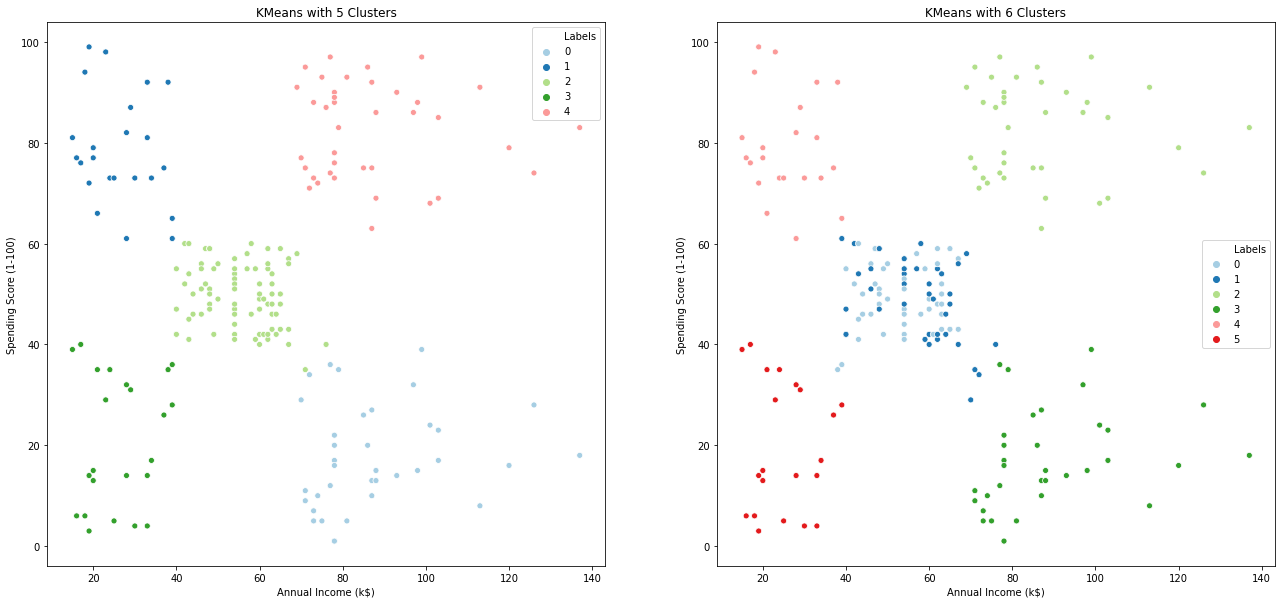

In [773]:
fig = plt.figure(figsize=(22, 10))

ax = fig.add_subplot(121)

km5 = KMeans(n_clusters=5).fit(data_processed)

data_processed['Labels'] = km5.labels_
sns.scatterplot(data_processed['Annual Income (k$)'], data_processed['Spending Score (1-100)'], hue=data_processed['Labels'], 
                palette=sns.color_palette("Paired", 5))
plt.title('KMeans with 5 Clusters')

ax = fig.add_subplot(122)

km6 = KMeans(n_clusters=6).fit(data_processed)

data_processed['Labels'] = km6.labels_
sns.scatterplot(data_processed['Annual Income (k$)'], data_processed['Spending Score (1-100)'], hue=data_processed['Labels'], 
                palette=sns.color_palette("Paired", 6))
plt.title('KMeans with 6 Clusters')



plt.show()

In [774]:
data_processed['Labels'] = km5.labels_

clusters = round(data_processed.groupby(by='Labels', sort=True).mean(), 2)

clusters

,Age,Annual Income (k$),Spending Score (1-100)
Labels,,,
0,40.67,87.75,17.58
1,25.52,26.30,78.57
2,43.09,55.29,49.57
3,45.22,26.30,20.91
4,32.69,86.54,82.13


In [775]:
round(data_processed.drop('Labels', axis=1).describe(), 2)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


Finally we have identify 5 clusters:

- 0: Young customer (1q) with low incomes (1q) and high spending score (4q)
- 1: Medium-high age (2q) customer with high incomes (4q) and low spending score (1q)
- 2: Medium-low age (2q) customer with high incomes (4q) and high spending score(4q)
- 3: Medium-high age (2q) customer with low incomes (1q) and low spending score (1q)
- 4: Medium-high age (2q) customer with medium-high incomes (3q) and medium spending score (2q, almost in the median or the mean too)